### Practice Notebook

Super Deadly dont touch

By Manu Patil

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def update_func(state, t, system):
    x,y = state;
    changeElk = x + x*(system.a*x -system.b*x*y);
    changeWolf = y + y*(system.d*x*y-system.l*y);
    return State(wolves = changeElk, elks = changeWolf);

In [3]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [12]:
def make_system(wolves,elks , a , b , l , d ):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(wolves = 1, elks = 1);

    t0 = 0
    t_end = 2000
    
    return System(init=init, t0=t0, t_end=t_end,
                  a=a, b=b, l =l, d=d)

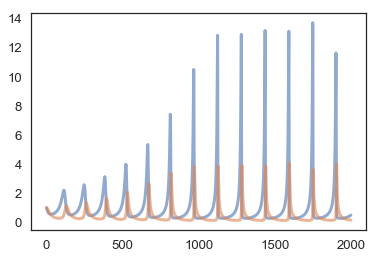

In [13]:
system = make_system(1, 1, .05,.1, .1, .1)
frame = run_simulation(system, update_func);
plot(frame.wolves);
plot(frame.elks);